## Import Libraries

In [12]:
# Import pandas library
import pandas as pd

# Import DataReader, Just type pip install pandas_datareader in your anaconda prompt
from pandas_datareader import DataReader

from datetime import date

## Import stock listing info from the NASDAQ

In [2]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/GitHub/Import_financial/nasdaq-listings.csv')

# Display first 10 rows
print(nasdaq.head(10))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   
5           FB         Facebook, Inc.     139.39           4.030000e+11   
6        CMCSA    Comcast Corporation      37.14           1.760000e+11   
7         INTC      Intel Corporation      35.25           1.660000e+11   
8         CSCO    Cisco Systems, Inc.      32.42           1.620000e+11   
9         AMGN             Amgen Inc.     161.61           1.190000e+11   

  IPO Year             Sector  \
0     1980         Technology   
1      NAN         Technology   
2     2004         Technology   
3     1986         Technology   
4     199

## Read data using .read_csv() with adequate parsing arguments

### .read_csv() options:

#### na_values: Converts a given string to np.nan, defaults to None
#### parse_dates: Reads the data in a list of given columns as dtype datetime64, defaults to False

In [3]:
# Import the data
nasdaq = pd.read_csv('C:/Users/Y/Documents/GitHub/Import_financial/nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display the head of the data
print(nasdaq.head())

# Inspect the data
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Load listing info from a single sheet

In [4]:
# Import the data
nyse = pd.read_excel('C:/Users/Y/Documents/GitHub/Import_financial/listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

## Load listing data from two sheets

In [5]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/GitHub/Import_financial/listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


##  Load all listing data and iterate over key-value dictionary pairs

In [6]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('C:/Users/Y/Documents/GitHub/Import_financial/listings.xlsx', sheetname='nyse', na_values='n/a')
nasdaq = pd.read_excel('C:/Users/Y/Documents/GitHub/Import_financial/listings.xlsx', sheetname='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
Stock Symbol             3147 non-null object
Company Name             3147 non-null object
Last Sale                3079 non-null float64
Market Capitalization    3147 non-null float64
IPO Year                 1361 non-null float64
Sector                   2177 non-null object
Industry                 2177 non-null object
dtypes: float64(3), object(4)
memory usage: 172.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


## Automate the loading and combining of data from multiple Excel worksheets

In [18]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('C:/Users/Y/Documents/GitHub/Import_financial/listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


## Get stock data for a single company

In [8]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016, 12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'google'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

              Open    High     Low   Close    Volume
Date                                                
2016-11-25  111.47  111.87  110.95  111.79  11475922
2016-11-28  111.43  112.46  111.39  111.57  27193983
2016-11-29  110.78  112.03  110.07  111.46  28528750
2016-11-30  111.60  112.20  110.27  110.52  36162258
2016-12-01  110.36  110.94  109.03  109.49  37086862
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-25 to 2017-11-22
Data columns (total 5 columns):
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


## Visualize a stock price trend

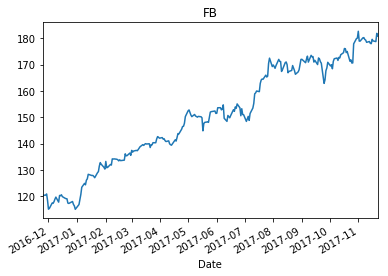

In [10]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'google'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

## Visualize the long-term gold price trend

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12953 entries, 1968-04-01 to 2017-11-22
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12555 non-null float64
dtypes: float64(1)
memory usage: 202.4 KB


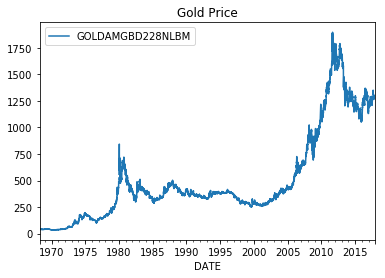

In [13]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

## Compare labor market participation and unemployment rates

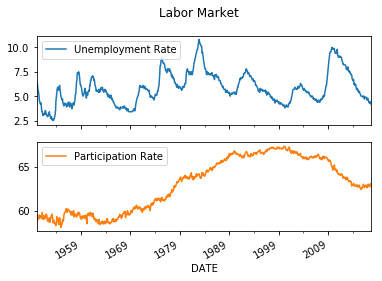

In [14]:
# Set the start date
start = date(1950, 1, 1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start=start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate','Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

##  Compare bond and stock performance

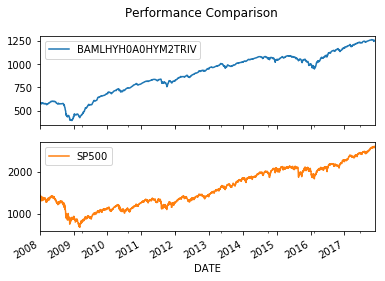

In [15]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(title='Performance Comparison',subplots=True)

# Show the plot
plt.show()

## Select the top 5 listed consumer companies 

In [19]:
# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11


##  Get the ticker of the largest consumer services company

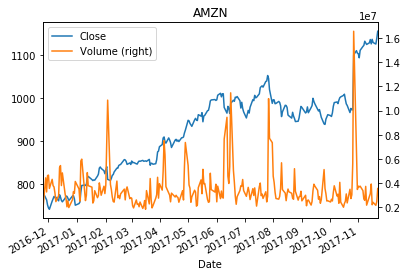

In [41]:
# Get ticker of the largest Consumer Services company
ticker = listings.loc[listings.Sector=='Consumer Services', 'Market Capitalization'].idxmax()
ticker

# Set the start date
start = date(2012, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

## Get the largest consumer company listed after 1998

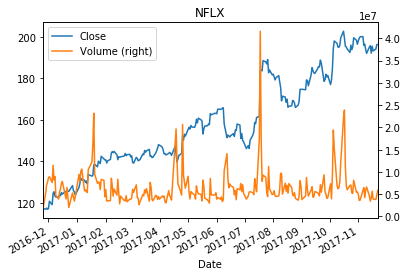

In [43]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(1998, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

##  Get data for the 3 largest financial companies

In [44]:
# Get ticker of 3 largest finance companies
top_3_companies = listings.loc[listings.Sector=='Finance','Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012, 1, 1)

# Import stock data
data = DataReader(top_3_tickers, 'google', start)
data2 = data.to_frame()

# Unstack and inspect result
data2['Close'].unstack().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2016-11-25 to 2017-11-22
Data columns (total 3 columns):
BAC    250 non-null float64
JPM    250 non-null float64
WFC    250 non-null float64
dtypes: float64(3)
memory usage: 7.8 KB
